IMAGE CLASSIFICATION TASK

In [36]:
# importing libraries hells to train the model 
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# import the fashsion dataset from keras datasets
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data() # keras gives already split dataset in X_train, y_train X_test and y_test

In [21]:
print(y_train) # X is the orignal image data and y are their labels like 10 type image and according to that each type have specific label

[9 0 0 ... 3 0 5]


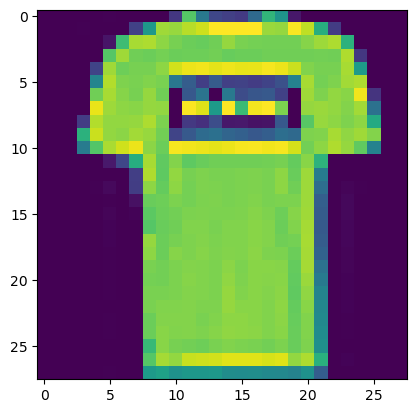

In [32]:
# show this dataset 
plt.imshow(X_train[1])

In [15]:
# height and width of an image
print("This is the w,h and size of test data",X_test.shape)
print("this is the w,h and size of train data", y_train.shape)

This is the w,h and size of test data (10000, 28, 28)
this is the w,h and size of train data (60000,)


In [ ]:
#looping to shows the each pixel of the image
image = X_train[3]
for dimension in image:
    for pixel in dimension:
        print(pixel, end = " ")

    print()


0 0 0 0 0 0 0 0 33 96 175 156 64 14 54 137 204 194 102 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 73 186 177 183 175 188 232 255 223 219 194 179 186 213 146 0 0 0 0 0 0 0 
0 0 0 0 0 35 163 140 150 152 150 146 175 175 173 171 156 152 148 129 156 140 0 0 0 0 0 0 
0 0 0 0 0 150 142 140 152 160 156 146 142 127 135 133 140 140 137 133 125 169 75 0 0 0 0 0 
0 0 0 0 0 54 167 146 129 142 137 137 131 148 148 133 131 131 131 125 140 140 0 0 0 0 0 0 
0 0 0 0 0 0 110 188 133 146 152 133 125 127 119 129 133 119 140 131 150 14 0 0 0 0 0 0 
0 0 0 0 0 0 0 221 158 137 135 123 110 110 114 108 112 117 127 142 77 0 0 0 0 0 0 0 
0 0 0 0 0 4 0 25 158 137 125 119 119 110 117 117 110 119 127 144 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 123 156 129 112 110 102 112 100 121 117 129 114 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 125 169 127 119 106 108 104 94 121 114 129 91 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 2 0 98 171 129 112 104 114 106 102 112 104 133 64 0 4 0 0 0 0 0 0 
0 0 0 0 0 0 2 0 66 173 135 129 98 100 119 102 108 98 135 60 0 4 0 0 0 0 0 0

In [39]:
# normalize this data for the best training of the Deep Learning model reduce the image pixel values from 0 to 255 into the 0 and 1 that our model can train easily in this normalize data 
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0


In [ ]:
# checks that our data of image pixels is normalize
image = X_train[3]
for dimen in image:
    for pixels in dimen:
        print(pixels, end = " ")
    print()

0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.00050749717 0.0014763552 0.0026912726 0.0023990774 0.000984237 0.00021530181 0.00083044986 0.0021068822 0.0031372549 0.002983468 0.0015686274 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0011226452 0.0028604383 0.00272203 0.0028143022 0.0026912726 0.0028911957 0.0035678586 0.003921569 0.0034294503 0.0033679355 0.002983468 0.0027527874 0.0028604383 0.0032756634 0.0022452904 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.00053825456 0.0025067283 0.0021530183 0.0023068052 0.0023375626 0.0023068052 0.0022452904 0.0026912726 0.0026912726 0.0026605153 0.0026297579 0.0023990774 0.0023375626 0.0022760478 0.0019838526 0.0023990774 0.0021530183 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0023068052 0.0021837757 0.0021530183 0.0023375626 0.0024605922 0.0023990774 0.0022452904 0.0021837757 0.001953095 0.0020761248 0.0020453674 0.0021530183 0.0021530183 0.0021068822 0.0020453674 0.0019223376 0.0025990005 0.0011534026 0.0 0.0 0.0 0.0 0.0 
0.

In [ ]:
# check the shape to confirm where to reshape the X_train and test data to add the information of the colour channel
print(X_train.shape[0])

60000


In [47]:
# their are grayscale image so their colour channel is 0,1 so add 1 information in this dataset ig this is colour image means R,G,B then reshape this add 3 channels information in this data 
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)

In [ ]:
# Start Building the Model
inner_layer = tf.keras.layers.Input(shape = (28,28,1)) # input layer that tells the shape of our data ensure that our data is the fixed shape


# start building the model layer
model = tf.keras.models.Sequential([
    inner_layer,
    tf.keras.layers.Conv2D(filters = 10, kernel_size = (3,3), activation = 'relu'),
    tf.keras.layers.Conv2D(filters = 10, kernel_size = (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(filters = 10, kernel_size = (3,3), activation = 'relu'),
    tf.keras.layers.Conv2D(filters = 10, kernel_size = (3,3), activation = 'relu'),
    tf.keras.layers.Conv2D(filters = 10, kernel_size = (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation = 'sigmoid') # use their softmax i mistakely use this sigmoid for their which give prediction in yes/no but it works

])

In [59]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 26, 26, 10)     │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 24, 24, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 12, 12, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 10, 10, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 8, 8, 10)       │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 6, 6, 10)       │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 3, 3, 10)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 90)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           910 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,650 (18.16 KB)

 Trainable params: 4,650 (18.16 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# set the rules for how to adjuest model weight during training and which thing to reduce during traing and how to measure model in which metrics
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [63]:
# start the final training 
model.fit(X_train, y_train, epochs = 50, batch_size = 32, verbose = 1)

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 11ms/step - accuracy: 0.5051 - loss: 1.3155
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.7385 - loss: 0.6915
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.7645 - loss: 0.6345
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.7789 - loss: 0.6005
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.7922 - loss: 0.5687
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8039 - loss: 0.5322
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.8197 - loss: 0.5015
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.8224 - loss: 0.4912
Epoch 9/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8322 - loss: 0.4662
Epoch 10/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.8379 - loss: 0.4490
Epoch 11/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.8414 - loss: 0.4384
Epoch 12

In [64]:
#evaluate the model
model.evaluate(X_test, y_test, verbose = 1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3129 - loss: 204.2968


[202.9019317626953, 0.31200000643730164]

In [ ]:
# make a directory in the system and save the train model in the hard drive
import os
os.makedirs("image_classification_model", exist_ok = True)

In [ ]:
# save the model in hard drive of system for further use
model.save('image_classification_model/model.keras')

TEST THE TRAIN MODEL

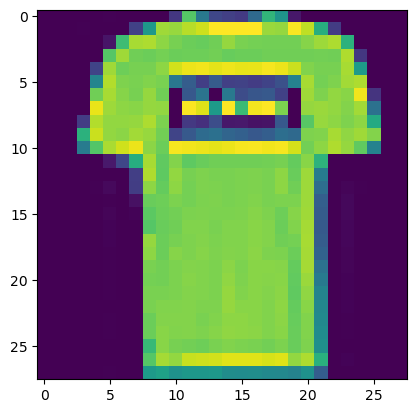

In [102]:
image = X_train[1]
plt.imshow(image)

In [103]:
def test_model(img):
    prediction = model.predict(img.reshape(1,28,28,1))
    max_value = prediction.argmax()
    print("this is the max value of the image", max_value)
    return max_value

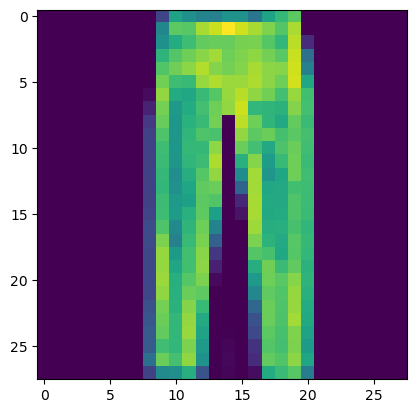

In [107]:
image = X_train[16]
plt.imshow(image)

In [108]:
t = test_model(X_train[16])
if t == 0:
    print("T-shirt/top")
if t == 1:
    print("Trouser")
if t == 2:
    print("Pullover")
if t == 3:
    print(" Dress")
if t == 4:
    print("Coat")
if t == 5:
    print("Sandal")
if t == 6:
    print("Shirt")
if t == 7:
    print(" Sneaker")
if t == 8:
    print("Bag")
if t == 9:
    print("Ankle boot")

print(t)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
this is the max value of the image 1
Trouser
1


In [ ]:
FINISH <-------------------------------------------------------------------------------->

In [110]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 26, 26, 10)     │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 24, 24, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 12, 12, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 10, 10, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 8, 8, 10)       │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 6, 6, 10)       │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 3, 3, 10)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 90)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           910 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,952 (54.50 KB)

 Trainable params: 4,650 (18.16 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 9,302 (36.34 KB)

In [ ]:
# for check how many layers are used to train this model
model.layers

[<Conv2D name=conv2d_15, built=True>,
 <Conv2D name=conv2d_16, built=True>,
 <MaxPooling2D name=max_pooling2d_6, built=True>,
 <Conv2D name=conv2d_17, built=True>,
 <Conv2D name=conv2d_18, built=True>,
 <Conv2D name=conv2d_19, built=True>,
 <MaxPooling2D name=max_pooling2d_7, built=True>,
 <Flatten name=flatten_3, built=True>,
 <Dense name=dense_3, built=True>]

In [123]:
# For Finetune deep learning Model if want to freeze the Train layers of Model and train only new laers we add 




model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 25, kernel_size = (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation = 'softmax')


])



In [124]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [120]:
model.fit(X_train, y_train, epochs = 10, batch_size = 32, verbose = 1)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.5103 - loss: 1.6351
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7596 - loss: 0.6773
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7870 - loss: 0.5966
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8057 - loss: 0.5498
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8160 - loss: 0.5180
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8225 - loss: 0.5038
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8289 - loss: 0.4872
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8365 - loss: 0.4683
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8364 - loss: 0.4663
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8406 - loss: 0.4530


In [121]:
model.evaluate(X_test, y_test, verbose = 1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5968 - loss: 172.4668


[176.7407989501953, 0.5899999737739563]

In [125]:
model.layers

[<Conv2D name=conv2d_21, built=False>,
 <MaxPooling2D name=max_pooling2d_9, built=True>,
 <Flatten name=flatten_5, built=False>,
 <Dense name=dense_5, built=False>]